In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from time import time

import numpy as np
import pandas as pd
import xarray as xr
from sklearn.linear_model import LinearRegression
from scipy import signal
import xrscipy.signal as dsp

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from cmocean import cm
import hvplot.xarray

import gsw

from niwtools.tools import *
from niwtools.qc import *
from epsilon_tools import *

import warnings
warnings.simplefilter("ignore",category=FutureWarning)
warnings.simplefilter("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore")
# warnings.simplefilter("ignore",category=UnevenSamplingWarning)

purp = pd.read_pickle('../data/purp_colormap.pkl')
# set up figure params
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1.3)
mpl.rc('figure', dpi=100, figsize=[12, 6])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

xr.set_options(display_style="text", display_width=100,warn_for_unclosed_files=True);

In [ ]:
first

In [105]:
def add_cfs_data(raw, floatid):
    cfs = xr.open_dataset('../data/metdata/float_cfs_hourly.nc')
    cfs = cfs.sel(floatid=f'{floatid}')
    cfs = cfs.interp_like(raw)

    # extract uppermost velocity measuremnt
    indu = first_finite(raw.u, 0)
    indv = first_finite(raw.v, 0)
    raw['u_surf'] = raw.u[indu]
    raw['v_surf'] = raw.v[indv]

    # extract uppermost velocity measuremnt
    try:
        indu = first_finite(raw.uNI, 0)
        indv = first_finite(raw.vNI, 0)
        raw['u_surf_ni'] = raw.uNI[indu]
        raw['v_surf_ni'] = raw.vNI[indv]
    except:
        None
    raw['tx'] = ('time', -cfs['tx'])
    raw['ty'] = ('time', -cfs['ty'])

    f = gsw.f(40.7)/(2*np.pi)
    try:
        raw = bandpass_variable(raw,'tx', 0.75*f, 1.25*f)
        raw = bandpass_variable(raw,'ty', 0.75*f, 1.25*f)
    except:
        None

    raw['taudotu'] = raw.u_surf * raw.tx + raw.v_surf * raw.ty
    try:
        raw['taudotu_ni'] = raw.u_surf_ni * raw.tx + raw.v_surf_ni * raw.ty
        raw['taudotu_ni_ni'] = raw.u_surf_ni * raw.txNI + raw.v_surf_ni * raw.tyNI
    except:
        None
    raw['tau'] = ('time', np.sqrt( raw.tx**2 + raw.ty**2 ))
    return raw

7781a
7788a
7787a
7779a
7783a
7786a


(-0.1, 2)

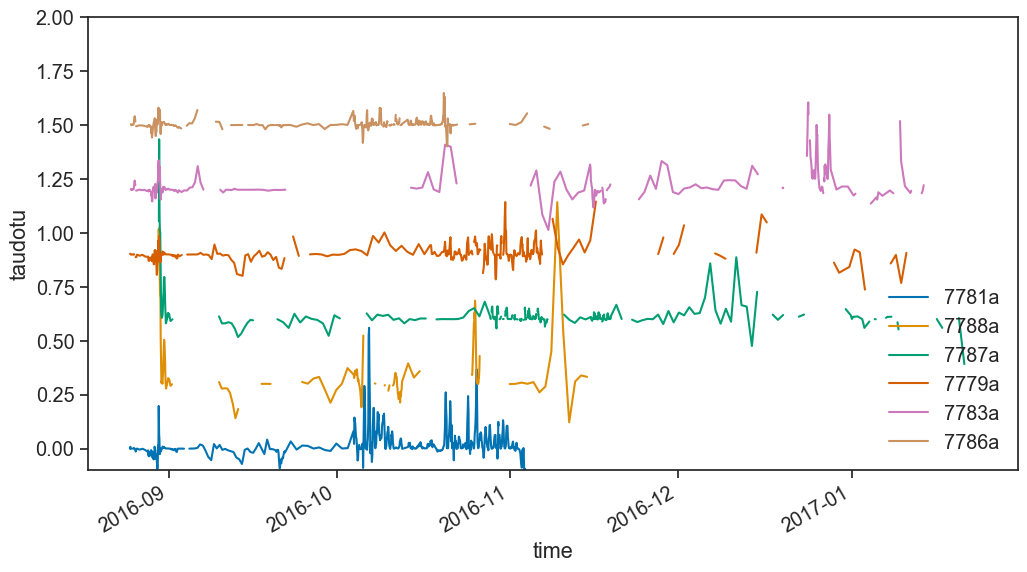

In [100]:
floatids = ['7781a','7788a','7787a','7779a','7783a','7786a']
# floatids = ['7700b','7701b','7780b','7784b','7785b','7786b']
offset=0
for floatid in floatids:
    print(floatid)
    raw = xr.open_dataset(f'../data/xarray/xr_{floatid}.nc')
    cfs = xr.open_dataset('../data/metdata/float_cfs_hourly.nc')
    cfs = cfs.sel(floatid=f'{floatid}')

    # need to relax the qc criteria a bit because of heaving due to larger surface gravity waves
    raw = qc_velocity(raw, RotPmax = 25, verrmax = 0.1)
    raw['mld'] = ('time', raw.z.where(raw.S2 == raw.S2.max(dim='z')).mean(dim='z'))
    
    ml_mask = (raw.z>raw.mld) & (raw.z<0)
    raw['hke'] = 1025*0.5*(raw.u**2 + raw.v**2)
    raw['hke_ml'] = -raw.hke.where(ml_mask).fillna(0).sum(dim='z')/raw.mld
    
    raw = add_cfs_data(raw, floatid)
    (raw.taudotu+offset).plot(label=floatid)
#     (raw.hke_ml+offset).plot(label=floatid)
    offset +=0.3
# plt.yscale('log')
plt.legend()
plt.ylim(-0.1,2)

7781a
7788a
7787a
7779a
7783a
7786a


(-0.1, 1000)

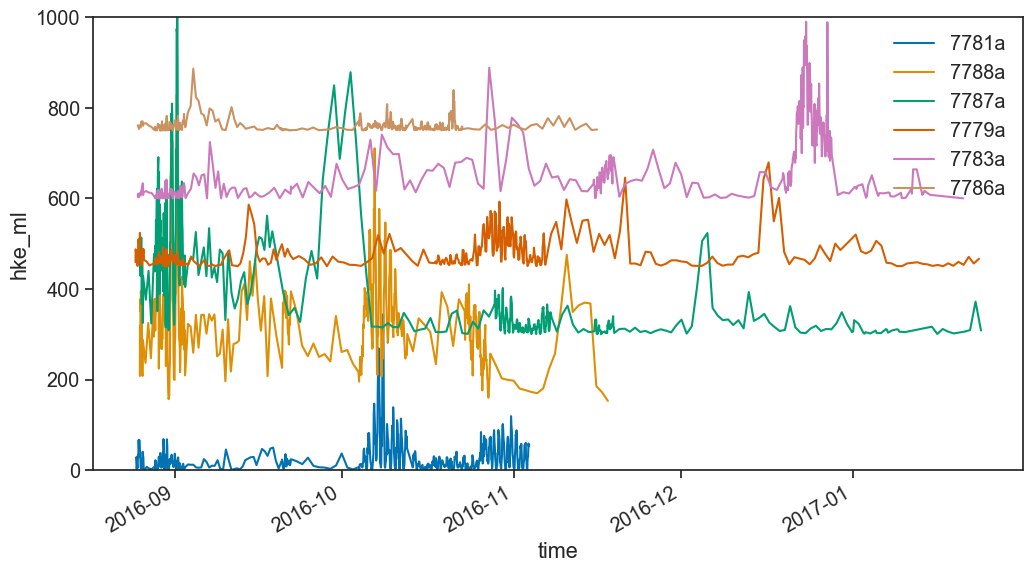

In [101]:
floatids = ['7781a','7788a','7787a','7779a','7783a','7786a']
# floatids = ['7700b','7701b','7780b','7784b','7785b','7786b']
offset=0
for floatid in floatids:
    print(floatid)
    raw = xr.open_dataset(f'../data/xarray/xr_{floatid}.nc')
    cfs = xr.open_dataset('../data/metdata/float_cfs_hourly.nc')
    cfs = cfs.sel(floatid=f'{floatid}')

    # need to relax the qc criteria a bit because of heaving due to larger surface gravity waves
    raw = qc_velocity(raw, RotPmax = 25, verrmax = 0.1)
    raw['mld'] = ('time', raw.z.where(raw.S2 == raw.S2.max(dim='z')).mean(dim='z'))
    
    ml_mask = (raw.z>raw.mld) & (raw.z<0)
    raw['hke'] = 1025*0.5*(raw.u**2 + raw.v**2)
    raw['hke_ml'] = -raw.hke.where(ml_mask).fillna(0).sum(dim='z')/raw.mld
    
    raw = add_cfs_data(raw, floatid)
#     (raw.taudotu+offset).plot(label=floatid)
    (raw.hke_ml+offset).plot(label=floatid)
    offset +=150
# plt.yscale('log')
plt.legend()
plt.ylim(-0.1,1000)

7700b
7701b
7780b
7784b
7785b
7786b


(-0.1, 3)

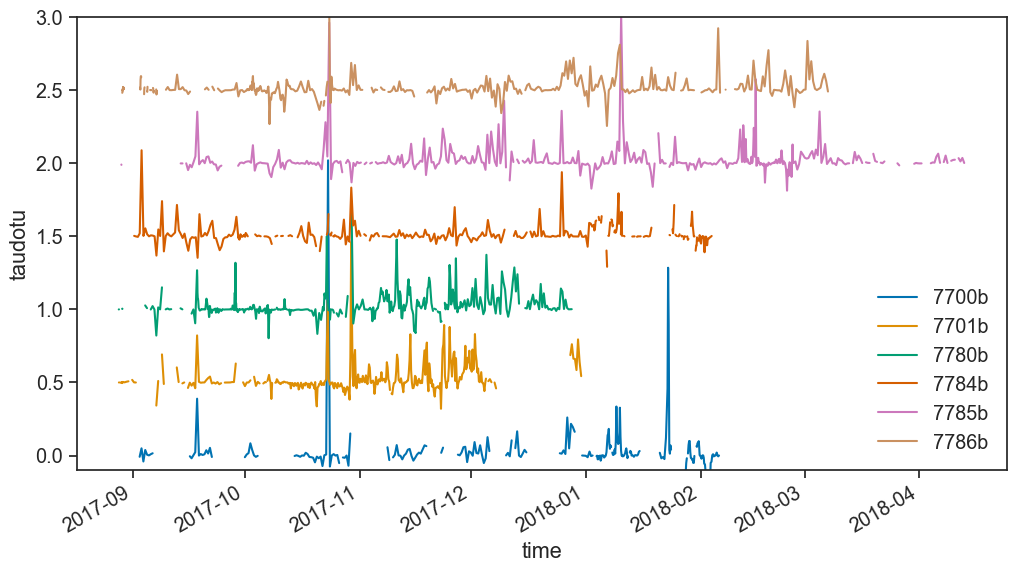

In [102]:
# floatids = ['7781a','7788a','7787a','7779a','7783a','7786a']
floatids = ['7700b','7701b','7780b','7784b','7785b','7786b']
offset=0
for floatid in floatids:
    print(floatid)
    raw = xr.open_dataset(f'../data/xarray/xr_{floatid}.nc')
    cfs = xr.open_dataset('../data/metdata/float_cfs_hourly.nc')
    cfs = cfs.sel(floatid=f'{floatid}')

    # need to relax the qc criteria a bit because of heaving due to larger surface gravity waves
    raw = qc_velocity(raw, RotPmax = 25, verrmax = 0.1)
    raw['mld'] = ('time', raw.z.where(raw.S2 == raw.S2.max(dim='z')).mean(dim='z'))
    
    ml_mask = (raw.z>raw.mld) & (raw.z<0)
    raw['hke'] = 1025*0.5*(raw.u**2 + raw.v**2)
    raw['hke_ml'] = -raw.hke.where(ml_mask).fillna(0).sum(dim='z')/raw.mld
    
    raw = add_cfs_data(raw, floatid)
    (raw.taudotu+offset).plot(label=floatid)
#     (raw.hke_ml+offset).plot(label=floatid)
    offset +=0.5
# plt.yscale('log')
plt.legend()
plt.ylim(-0.1,3)

7700b
7701b
7780b
7784b
7785b
7786b


(-0.1, 1000)

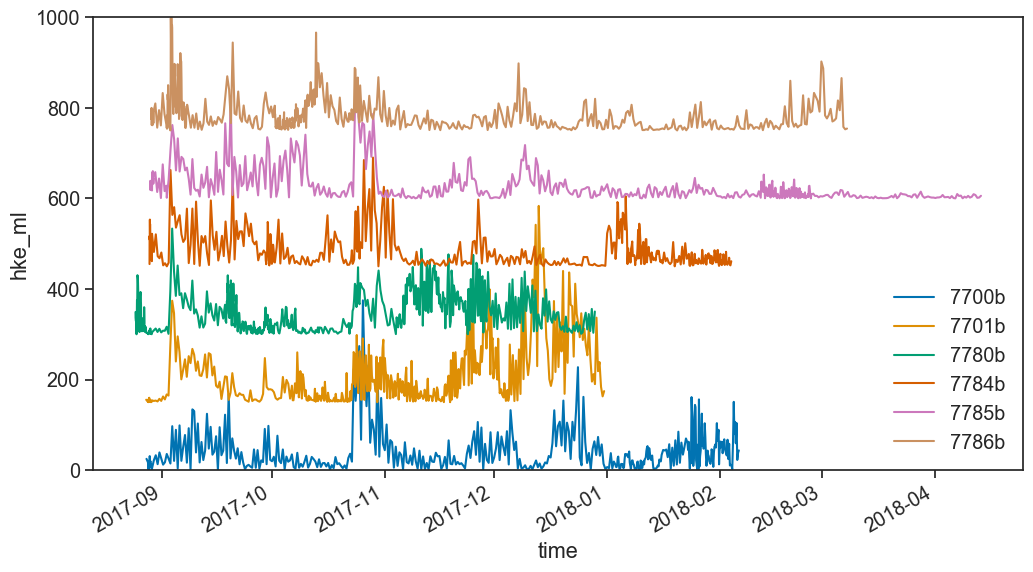

In [103]:
# floatids = ['7779a','7781a','7783a','7786a','7787a','7788a']
floatids = ['7700b','7701b','7780b','7784b','7785b','7786b']
offset=0
for floatid in floatids:
    print(floatid)
    raw = xr.open_dataset(f'../data/xarray/xr_{floatid}.nc')
    cfs = xr.open_dataset('../data/metdata/float_cfs_hourly.nc')
    cfs = cfs.sel(floatid=f'{floatid}')

    # need to relax the qc criteria a bit because of heaving due to larger surface gravity waves
    raw = qc_velocity(raw, RotPmax = 25, verrmax = 0.1)
    raw['mld'] = ('time', raw.z.where(raw.S2 == raw.S2.max(dim='z')).mean(dim='z'))
    
    ml_mask = (raw.z>raw.mld) & (raw.z<0)
    raw['hke'] = 1025*0.5*(raw.u**2 + raw.v**2)
    raw['hke_ml'] = -raw.hke.where(ml_mask).fillna(0).sum(dim='z')/raw.mld
    
    raw = add_cfs_data(raw, floatid)
#     (raw.taudotu+offset).plot(label=floatid)
    (raw.hke_ml+offset).plot(label=floatid)
    offset +=150
# plt.yscale('log')
plt.legend()
plt.ylim(-0.1,1000)